In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 5)

In [17]:
def projection1(lamb):
    for i in range(np.size(lamb)):
        if lamb[i,0]< 0:
            lamb[i,0] = 0
    return lamb

## part 5c,d
def gradient_descent(y,A,b,stepsize):
    [m,n] = np.shape(A)
    lamb = np.zeros((m,1))
    iters = 0
    x = np.zeros((101,n))
    x[0] = y.T
    
    while iters<100:
        gradient = np.dot(AAT,lamb) - (np.dot(A,y)-b)
        lamb = lamb - stepsize*gradient
        lamb = projection1(lamb)
        iters += 1
        x[iters] = (y - np.dot(A.T,lamb)).T
        
    return x

def projection2(z,a,b):
    a = a.reshape(-1,1)
    lamb = (np.dot(a.T,z)-b)/np.dot(a.T,a) ## projection onto a convex set a.T*x = b
    return z - lamb*a

def projected_gradient_descent(z,A,b):
    x = z
    iters = 0
    cons = []
    for i in range(np.shape(A)[0]):
        if abs(np.dot(A[i,:],x)-b[i]) > 1e-7 :
            cons.append(i)
    print(cons)
    while (len(cons)>0 and iters<1000):
        y = projection2(x,A[0,:],b[0]) ## projection on first row of A
        x = projection2(y,A[1,:],b[1]) ## projection on second row of A
        cons = []
        for i in range(np.shape(A)[0]):
            if abs(np.dot(A[i,:],x)-b[i]) > 1e-7: ## !=0 to avoid for numerical issues
                cons.append(i)
        #print(cons)
        iters += 1
    print('Total iterations required = %d'%iters)
    return x

In [18]:
## part 5c

A = np.array([[1,1,1],[-1,0,0],[0,-1,1]])
b = np.array([8,0,0])
b = b.reshape(3,1)
AAT = np.dot(A,A.T)
eigs,v = np.linalg.eig(AAT)
L = np.amax(eigs)
stepsize = 1/L
x = gradient_descent(np.array([3,-1,2]).reshape(3,1),A,b,stepsize)
x_projected = x[-1,:]
print(x_projected)


[3.  0.5 0.5]


[1. 0.] [1.00000e+00 1.03473e-13]


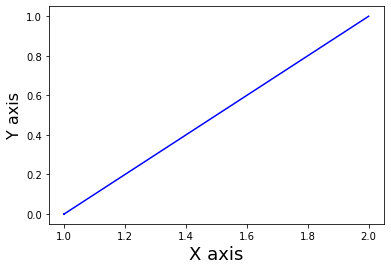

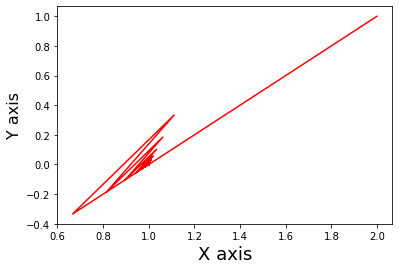

In [19]:
## part 5d

A = np.array([[1,1],[-1,0],[0,-1]])
b = np.array([1,0,0]).reshape(3,1)
AAT = np.dot(A,A.T)
eigs,v = np.linalg.eig(AAT)
L = np.amax(eigs)
stepsize = 1/L
x1 = gradient_descent(np.array([2,1]).reshape(2,1),A,b,stepsize) ## stepsize = 1/l
x2 = gradient_descent(np.array([2,1]).reshape(2,1),A,b,2*stepsize) ## stepsize = 2/l
x_projected1 = x1[-1,:]
x_projected2 = x2[-1,:]
print(x_projected1,x_projected2)


colors = ['c','m','y']
fig = plt.figure()
plt.xlabel('X axis', fontsize=18)
plt.ylabel('Y axis', fontsize=16)

#plt.legend(loc='lower right', fontsize='small')

plt.plot(x1[:,0],x1[:,1],color ='blue')
#plt.legend(loc='lower right', fontsize='small')

plt.show()
#fig.savefig('partd1.jpg')
plt.close()

fig = plt.figure()
plt.xlabel('X axis', fontsize=18)
plt.ylabel('Y axis', fontsize=16)
#plt.plot(x1[:,0],x1[:,1],color = 'blue')
plt.plot(x2[:,0],x2[:,1],color = 'red')
plt.show()
plt.close()

In [20]:
## part d

A = np.array([[1,3,0],[0,2,1]])
b = np.array([1,-1]).reshape(2,1)
AAT_inv = np.linalg.inv(np.dot(A,A.T))
x = -np.dot(A.T,np.dot(AAT_inv,-b))
print(x)

x_projected = projected_gradient_descent(np.array([0,0,0]).reshape(3,1),A,b)
print(x_projected,np.dot(A,x_projected))

[[ 0.78571]
 [ 0.07143]
 [-1.14286]]
[0, 1]
Total iterations required = 53
[[ 0.78571]
 [ 0.07143]
 [-1.14286]] [[ 1.]
 [-1.]]
